In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

# Suppress specific future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [264]:
# load sales data
data=pd.read_csv(r"E:\data science question\project\next techleap internship\SALES TREND ANALYSIS\sales_data_sample.csv",encoding='ISO-8859-1')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [265]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [266]:
#changing'ORDERDATE' object datatype to datetime
data['ORDERDATE']=pd.to_datetime(data['ORDERDATE'])

In [267]:
data['ORDERDATE']

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]

In [268]:
#to check how many null values are there in data
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [269]:
# to check number of rows and columns in data
data.shape

(2823, 25)

In [270]:
# this give information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [271]:
# this describe 
data.describe(include="all")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,NaN,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,NaN,4.000000,12.000000,2005.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
data.duplicated().any()

False

In [273]:
data.shape

(2823, 25)

In [274]:
2823-147

2676

In [275]:
data.duplicated().any()

False

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [277]:
data['ORDERDATE']=pd.to_datetime(data['ORDERDATE'])
data['QUANTITYORDERED']=pd.to_numeric(data['QUANTITYORDERED'])
data['SALES']=pd.to_numeric(data['SALES'])

In [278]:
data.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [279]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [280]:
#duplicates are removed for analysis
data=data.drop_duplicates()

In [281]:
# columns are removed 
data.drop(columns=['ADDRESSLINE2','POSTALCODE','STATE','TERRITORY','YEAR_ID'],inplace=True)

In [282]:
# year is extracted from orderdate
data['YEAR_ID']=data['ORDERDATE'].dt.year

In [283]:
# checking null values
data.isna().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
YEAR_ID             0
dtype: int64

In [284]:
#we analyse each month sale by aggregrating the total sales for each month 
monthly_sales_trend=data.groupby(['MONTH_ID','YEAR_ID'])['SALES'].sum().reset_index()

In [285]:
monthly_sales_trend

,MONTH_ID,YEAR_ID,SALES
0,1,2003,129753.60
1,1,2004,316577.42
2,1,2005,339543.42
3,2,2003,140836.19
4,2,2004,311419.53
5,2,2005,358186.18
6,3,2003,174504.90
7,3,2004,205733.73
8,3,2005,374262.76
9,4,2003,201609.55


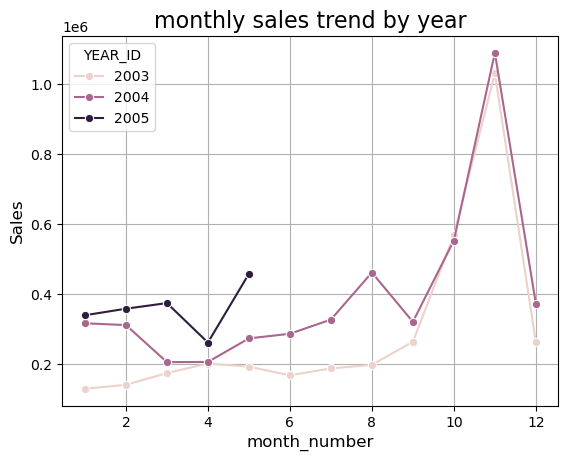

In [286]:
# visualisation to understand monthly sales trend by year
sns.lineplot(monthly_sales_trend,x='MONTH_ID',y='SALES',hue='YEAR_ID',marker='o')
plt.title("monthly sales trend by year",fontsize=16)
plt.xlabel("month_number",fontsize=12)
plt.ylabel("Sales",fontsize=12)
plt.grid()
plt.show()

In [287]:
quaterly_sales_trend=data.groupby(['QTR_ID','YEAR_ID'])['SALES'].sum().reset_index()

In [288]:
quaterly_sales_trend

,QTR_ID,YEAR_ID,SALES
0,1,2003,445094.69
1,1,2004,833730.68
2,1,2005,1071992.36
3,2,2003,562365.22
4,2,2004,766260.73
5,2,2005,719494.35
6,3,2003,649514.54
7,3,2004,1109396.27
8,4,2003,1860005.09
9,4,2004,2014774.92


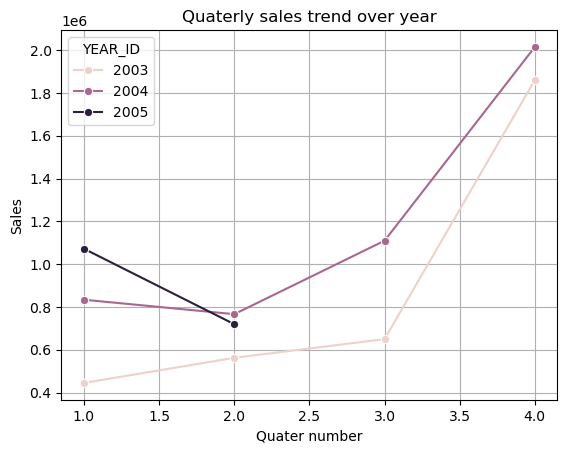

In [289]:

sns.lineplot(quaterly_sales_trend,x="QTR_ID",y="SALES",hue="YEAR_ID",marker='o')
plt.xlabel("Quater number")
plt.ylabel("Sales")
plt.title("Quaterly sales trend over year")
plt.grid()
plt.show()

In [290]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'YEAR_ID'],
      dtype='object')

In [291]:
# We grouped the data by `PRODUCTLINE` and calculated total revenue for each product line.
product_line_revenue=data.groupby('PRODUCTLINE')['SALES'].sum().reset_index().sort_values(by='SALES',ascending=False)

In [292]:
product_line_revenue

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
6,Vintage Cars,1903150.84
1,Motorcycles,1166388.34
5,Trucks and Buses,1127789.84
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47


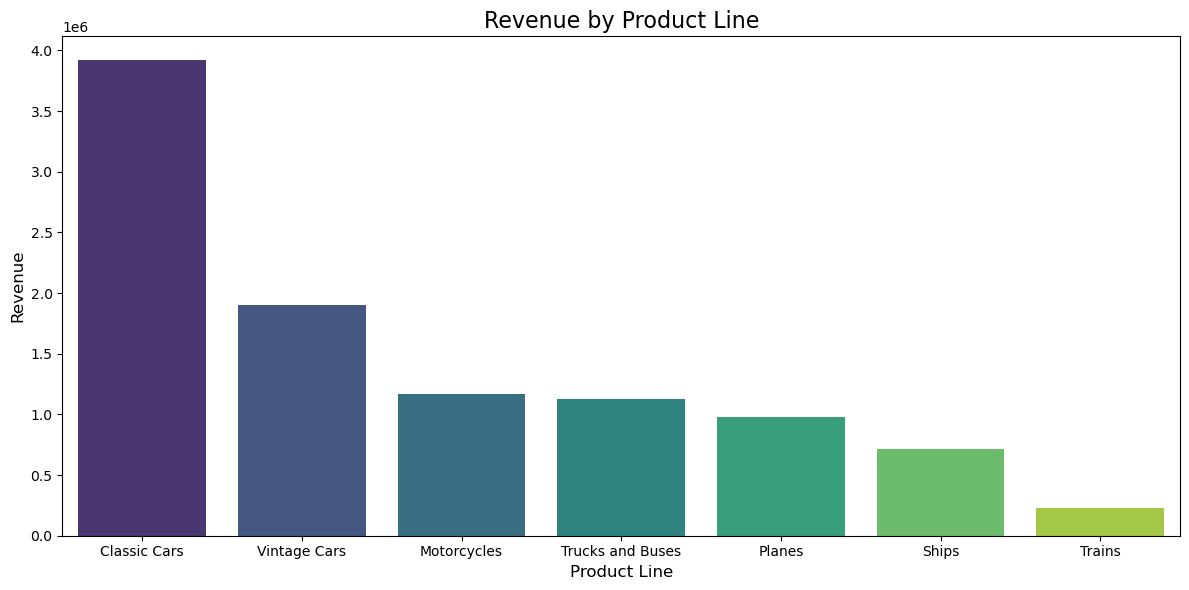

In [293]:
plt.figure(figsize = (12,6))
sns.barplot(data = product_line_revenue, x = 'PRODUCTLINE', y = 'SALES', palette='viridis')

## Add titles and labels
plt.title('Revenue by Product Line', fontsize =16)
plt.xlabel('Product Line', fontsize = 12)
plt.ylabel('Revenue', fontsize =12)

plt.tight_layout()
plt.show()

In [294]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'YEAR_ID'],
      dtype='object')

In [295]:
# pivot table by sales for every productline
sales=pd.pivot_table(data,index='PRODUCTLINE',values='SALES',aggfunc='sum')
sales

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Motorcycles,1166388.34
Planes,975003.57
Ships,714437.13
Trains,226243.47
Trucks and Buses,1127789.84
Vintage Cars,1903150.84


In [296]:
total_sales=data['SALES'].sum()
total_sales

10032628.85

In [297]:
sales['% of total sales']=(sales['SALES']/total_sales)*100
sales['% of total sales']

PRODUCTLINE
Classic Cars        39.068680
Motorcycles         11.625949
Planes               9.718326
Ships                7.121136
Trains               2.255077
Trucks and Buses    11.241220
Vintage Cars        18.969613
Name: % of total sales, dtype: float64

In [298]:
sales.sort_values(by='% of total sales',ascending=False)

,SALES,% of total sales
PRODUCTLINE,,
Classic Cars,3919615.66,39.068680
Vintage Cars,1903150.84,18.969613
Motorcycles,1166388.34,11.625949
Trucks and Buses,1127789.84,11.241220
Planes,975003.57,9.718326
Ships,714437.13,7.121136
Trains,226243.47,2.255077


In [299]:
data['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [300]:
sales_by_dealsize=data.groupby(['PRODUCTLINE','DEALSIZE'])['SALES'].agg(['mean','sum','count']).reset_index().sort_values(by='sum',ascending=False)


In [301]:
sales_by_dealsize.rename(columns={'mean':'AVERAGE','sum':'TOTAL_REVENUES','count':'ORDERS'},inplace=True)

In [302]:
sales_by_dealsize

,PRODUCTLINE,DEALSIZE,AVERAGE,TOTAL_REVENUES,ORDERS
1,Classic Cars,Medium,4585.393189,2430258.39,530
18,Vintage Cars,Medium,4159.156935,1085539.96,261
15,Trucks and Buses,Medium,4668.729600,817027.68,175
0,Classic Cars,Large,8212.801959,796641.79,97
2,Classic Cars,Small,2037.398471,692715.48,340
4,Motorcycles,Medium,4361.344167,680369.69,156
19,Vintage Cars,Small,1889.884565,608542.83,322
7,Planes,Medium,4175.240698,538606.05,129
9,Ships,Medium,3950.795047,422735.07,107
8,Planes,Small,2168.844167,364365.82,168


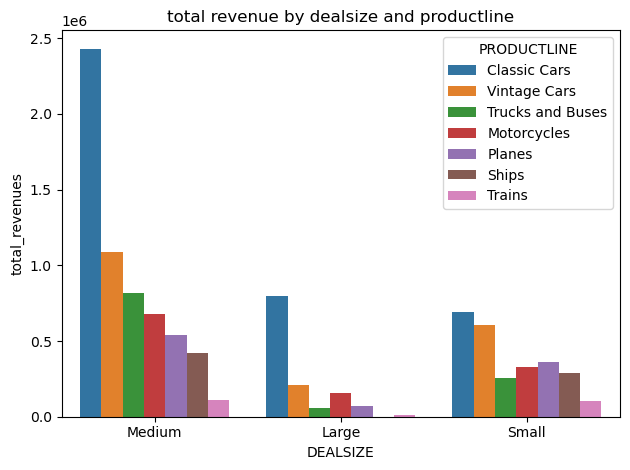

In [303]:
sns.barplot(data=sales_by_dealsize,x='DEALSIZE',y='TOTAL_REVENUES',hue='PRODUCTLINE',palette='tab10')
plt.title("total revenue by dealsize and productline")
plt.xlabel("DEALSIZE")
plt.ylabel("total_revenues")
plt.tight_layout()
plt.show()

In [304]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'YEAR_ID'],
      dtype='object')

In [305]:
total_revenue=data['SALES'].sum()
total_orders=data['ORDERNUMBER'].nunique()
average_order_value=total_revenue/total_orders
print(f"\033[1mTotal Revenue:\033[0m {total_revenue:,.2f}")
print(f"\033[1mTotal Number of Orders:\033[0m {total_orders}")
print(f"\033[1mAverage Order Value:\033[0m {average_order_value:,.2f}")

Total Revenue: 10,032,628.85
Total Number of Orders: 307
Average Order Value: 32,679.57


In [306]:
top_customers_by_revenue = data.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values(by = 'SALES',ascending = False).head(10)
top_customers_by_revenue 

,CUSTOMERNAME,SALES
33,Euro Shopping Channel,912294.11
55,Mini Gifts Distributors Ltd.,654858.06
6,"Australian Collectors, Co.",200995.41
58,Muscle Machine Inc,197736.94
44,La Rochelle Gifts,180124.90
31,"Dragon Souveniers, Ltd.",172989.68
45,Land of Toys Inc.,164069.44
81,The Sharp Gifts Warehouse,160010.27
0,"AV Stores, Co.",157807.81
3,"Anna's Decorations, Ltd",153996.13


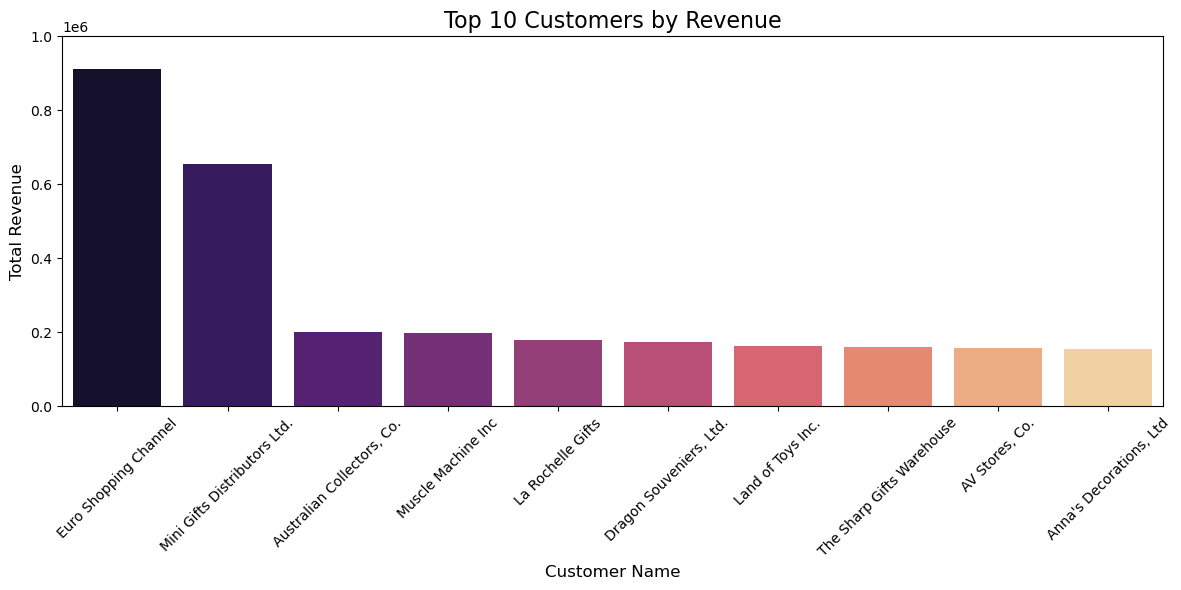

In [307]:
plt.figure(figsize=(12,6))
sns.barplot(data =top_customers_by_revenue, x = 'CUSTOMERNAME', y= 'SALES', palette = 'magma')

## Add titles and labels
plt.title('Top 10 Customers by Revenue', fontsize =16)
plt.xlabel('Customer Name', fontsize = 12)
plt.ylabel('Total Revenue', fontsize = 12)
plt.xticks(rotation =45)
plt.yticks(range(0,1000001,200000))

plt.tight_layout()
plt.show()


In [308]:
total=top_customers_by_revenue['SALES'].sum()
contribution_of_topcustomers=(total/total_revenue)*100
print("contribution_of_topcustomers:",contribution_of_topcustomers)

contribution_of_topcustomers: 29.452726640037124


In [309]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'YEAR_ID'],
      dtype='object')

In [310]:
frequent_orders=data.groupby(['CUSTOMERNAME','COUNTRY','PRODUCTLINE','DEALSIZE'])['ORDERNUMBER'].nunique().reset_index().sort_values('ORDERNUMBER',ascending=False)

In [311]:
frequent_orders

,CUSTOMERNAME,COUNTRY,PRODUCTLINE,DEALSIZE,ORDERNUMBER
268,Euro Shopping Channel,Spain,Classic Cars,Medium,16
269,Euro Shopping Channel,Spain,Classic Cars,Small,15
284,Euro Shopping Channel,Spain,Vintage Cars,Small,12
467,Mini Gifts Distributors Ltd.,USA,Classic Cars,Medium,12
478,Mini Gifts Distributors Ltd.,USA,Vintage Cars,Medium,10
...,...,...,...,...,...
403,Lyon Souveniers,France,Vintage Cars,Small,1
402,Lyon Souveniers,France,Vintage Cars,Medium,1
401,Lyon Souveniers,France,Vintage Cars,Large,1
400,Lyon Souveniers,France,Trucks and Buses,Medium,1


In [312]:
frequent_orders.rename(columns = {'ORDERNUMBER':'UNIQUE ORDERS'}, inplace =True)
frequent_orders

,CUSTOMERNAME,COUNTRY,PRODUCTLINE,DEALSIZE,UNIQUE ORDERS
268,Euro Shopping Channel,Spain,Classic Cars,Medium,16
269,Euro Shopping Channel,Spain,Classic Cars,Small,15
284,Euro Shopping Channel,Spain,Vintage Cars,Small,12
467,Mini Gifts Distributors Ltd.,USA,Classic Cars,Medium,12
478,Mini Gifts Distributors Ltd.,USA,Vintage Cars,Medium,10
...,...,...,...,...,...
403,Lyon Souveniers,France,Vintage Cars,Small,1
402,Lyon Souveniers,France,Vintage Cars,Medium,1
401,Lyon Souveniers,France,Vintage Cars,Large,1
400,Lyon Souveniers,France,Trucks and Buses,Medium,1


In [313]:
# calculate total revenue by country and filter top 10
top_countries=(data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10).index)
top_countries

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Denmark'],
      dtype='object', name='COUNTRY')

In [314]:
# calculate sales by product line of top countries
top_countries_data=data[data['COUNTRY'].isin(top_countries)]
sales_by_product_line=top_countries_data.groupby(['COUNTRY','PRODUCTLINE'])['SALES'].sum().reset_index()
sales_by_product_line

,COUNTRY,PRODUCTLINE,SALES
0,Australia,Classic Cars,193085.54
1,Australia,Motorcycles,89968.76
2,Australia,Planes,74853.87
3,Australia,Ships,4159.76
4,Australia,Trains,1681.35
...,...,...,...
62,USA,Planes,328432.89
63,USA,Ships,209688.14
64,USA,Trains,69253.56
65,USA,Trucks and Buses,397842.42


In [315]:
#create pivot table for stacked bar chart
pivot_data=sales_by_product_line.pivot(index='COUNTRY',columns='PRODUCTLINE',values="SALES").fillna(0)
pivot_data

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,193085.54,89968.76,74853.87,4159.76,1681.35,77318.50,189555.32
Denmark,157182.48,0.00,7586.45,38697.26,11476.33,9588.82,21105.81
Finland,153552.24,47866.72,34375.13,29808.44,5117.05,40479.33,18383.00
France,388951.20,226390.31,108155.51,66486.67,27340.80,116982.22,176609.81
Italy,128576.65,7567.80,98185.65,17703.54,6274.96,5914.97,110450.74
Norway,134787.37,51768.63,29500.70,0.00,11310.36,37075.64,43021.00
Singapore,132890.44,4175.60,0.00,14155.52,13278.71,89027.68,34960.46
Spain,476165.15,74634.82,89985.51,124459.97,43370.18,177556.78,229514.51
UK,159377.70,40802.81,41163.51,72959.17,12635.54,28142.99,123798.74


In [316]:
pivot_data['Total Revenue']=pivot_data.sum(axis=1)
pivot_data['Total Revenue']

COUNTRY
Australia     630623.10
Denmark       245637.15
Finland       329581.91
France       1110916.52
Italy         374674.31
Norway        307463.70
Singapore     288488.41
Spain        1215686.92
UK            478880.46
USA          3627982.83
Name: Total Revenue, dtype: float64

In [317]:
pivot_data=pivot_data.sort_values(by='Total Revenue',ascending=False).drop(columns='Total Revenue')

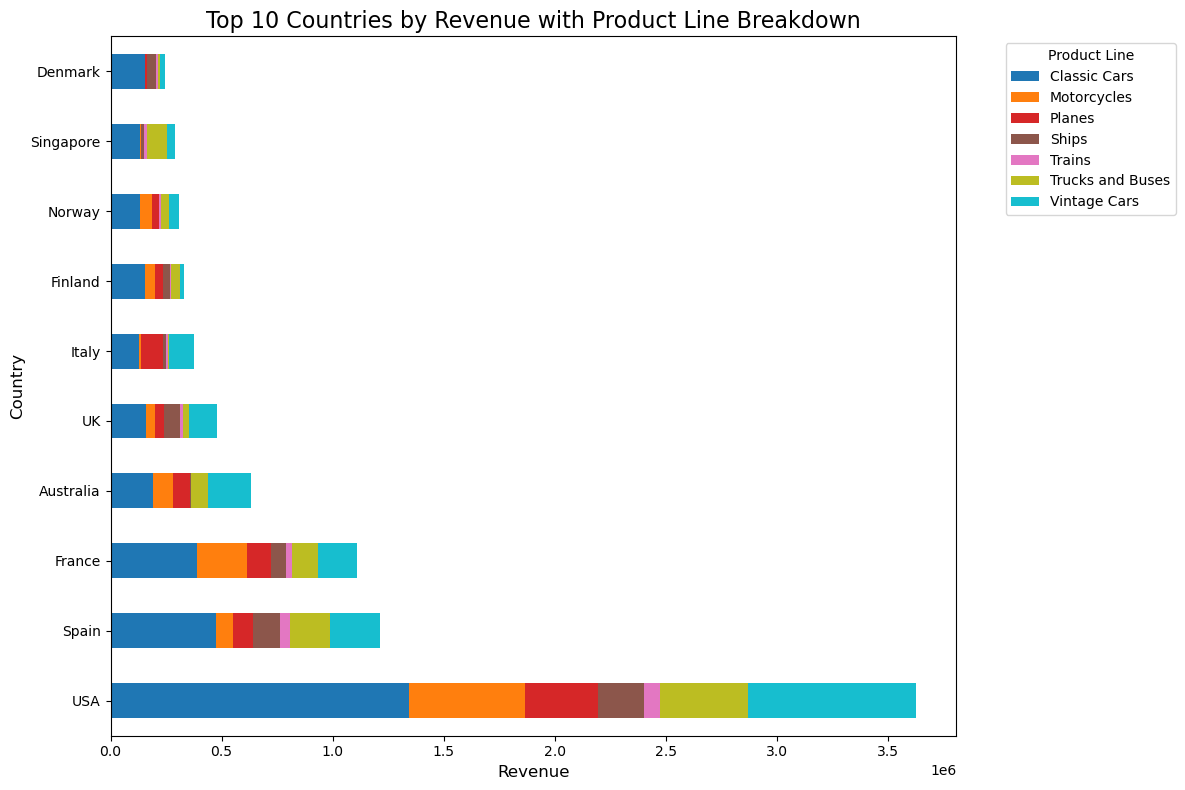

In [318]:
# plot stacked horizontal bar chart
pivot_data.plot(kind="barh",stacked=True,figsize=(12,8),colormap='tab10')
plt.title('Top 10 Countries by Revenue with Product Line Breakdown', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [319]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'YEAR_ID'],
      dtype='object')

In [377]:
# Top 10 popular products based on quantity ordered 
popular_products_by_volume=data.groupby(['PRODUCTCODE','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values('QUANTITYORDERED',ascending=False).head(10)
popular_products_by_volume

,PRODUCTCODE,PRODUCTLINE,QUANTITYORDERED
39,S18_3232,Classic Cars,1774
76,S24_3856,Classic Cars,1052
50,S18_4600,Trucks and Buses,1031
106,S700_4002,Planes,1029
14,S12_4473,Trucks and Buses,1024
77,S24_3949,Planes,1008
91,S50_1341,Vintage Cars,999
16,S18_1097,Trucks and Buses,999
29,S18_2432,Trucks and Buses,998
18,S18_1342,Vintage Cars,997


In [379]:
# pivot table for stacked bar chart
pivot_data= popular_products_by_volume.pivot(index='PRODUCTCODE', columns='PRODUCTLINE',values='QUANTITYORDERED').fillna(0)
pivot_data['Total Orders']= pivot_data.sum(axis=1)

In [381]:
pivot_data

PRODUCTLINE,Classic Cars,Planes,Trucks and Buses,Vintage Cars,Total Orders
PRODUCTCODE,,,,,
S12_4473,0.0,0.0,1024.0,0.0,1024.0
S18_1097,0.0,0.0,999.0,0.0,999.0
S18_1342,0.0,0.0,0.0,997.0,997.0
S18_2432,0.0,0.0,998.0,0.0,998.0
S18_3232,1774.0,0.0,0.0,0.0,1774.0
S18_4600,0.0,0.0,1031.0,0.0,1031.0
S24_3856,1052.0,0.0,0.0,0.0,1052.0
S24_3949,0.0,1008.0,0.0,0.0,1008.0
S50_1341,0.0,0.0,0.0,999.0,999.0


In [383]:
pivot_data=pivot_data.sort_values(by= 'Total Orders',ascending=False).drop(columns='Total Orders')

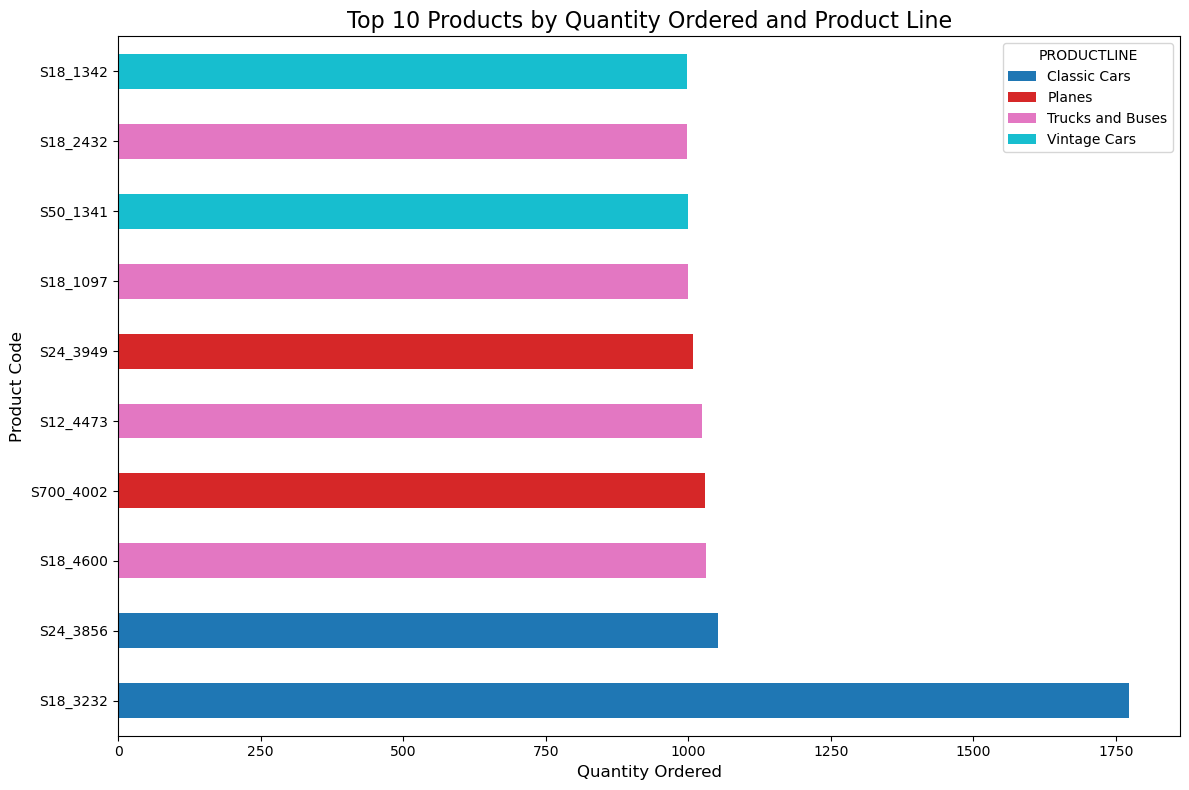

In [387]:
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(12,8),
    colormap='tab10')
## Add Titles and labels
plt.title('Top 10 Products by Quantity Ordered and Product Line', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product Code', fontsize=12)

plt.tight_layout()
plt.show()


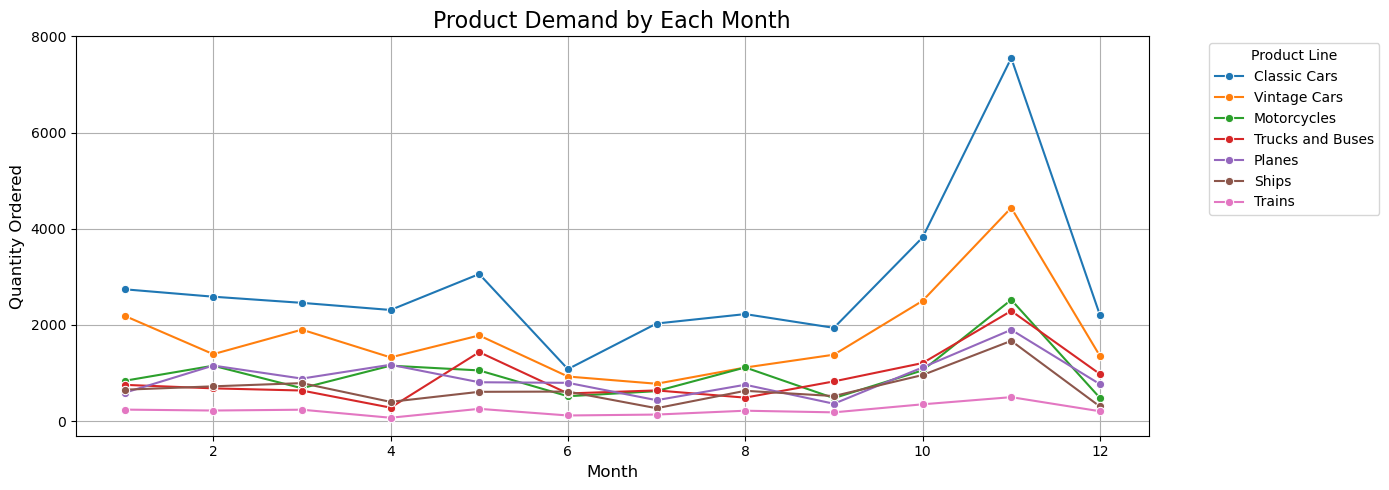

In [389]:
# Product Demand by each month by grouping Month_id and Product line together and summing quantity ordered 

product_demand_by_each_month= data.groupby(['MONTH_ID','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by = 'QUANTITYORDERED', ascending = False)

plt.figure(figsize = (14,5))
sns.lineplot(product_demand_by_each_month, x = "MONTH_ID", y = 'QUANTITYORDERED', hue = 'PRODUCTLINE', marker = 'o')

# Add titles and labels
plt.title('Product Demand by Each Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(range(0,8001,2000))

plt.grid()
plt.tight_layout()
plt.show()


In [393]:
# Product Demand by each Year by grouping Month_id and Product line together and summing quantity ordered 
product_demand_by_each_year= data.groupby(['YEAR_ID','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by='QUANTITYORDERED',ascending=False)

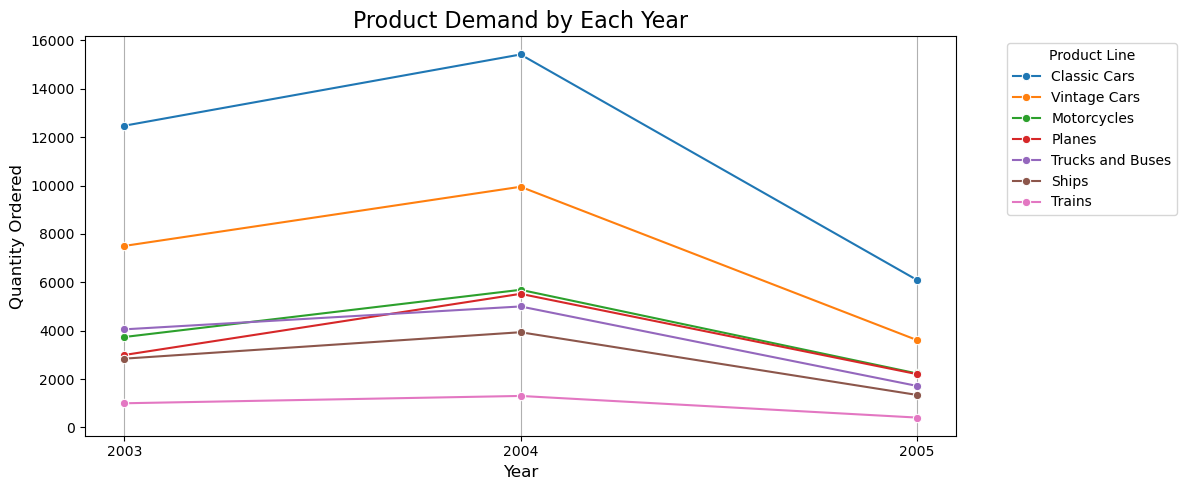

In [395]:
## Plot barplot
plt.figure(figsize = (12,5))
sns.lineplot(product_demand_by_each_year, x = "YEAR_ID", y = 'QUANTITYORDERED', hue = 'PRODUCTLINE', marker='o')

# Add titles and labels
plt.title('Product Demand by Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2003,2006,1))

plt.grid(axis = 'x')
plt.tight_layout()
plt.show()